### Importing needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### Downloading data

In [2]:
#url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101ENSkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
# fuel = pd.read_csv(url)
#fuel.to_csv("FuelConsumption.csv")

### Reading the data in

In [3]:
df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\Week 10-20221107T033716Z-001\Week 10\FuelConsumption.csv")
 #take a look at the database
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [4]:
#summarize the data
df.describe()

,Unnamed: 0,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,533.000000,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,308.160672,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,0.000000,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,266.500000,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,533.000000,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,799.500000,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,1066.000000,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
#Let's select some feature to explore more

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


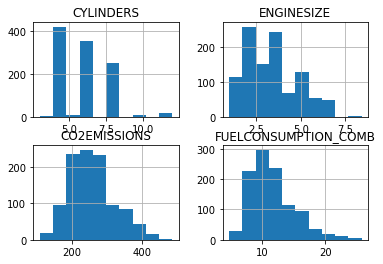

In [6]:
#we can plot each of these features:

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

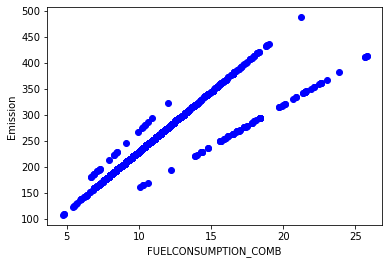

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

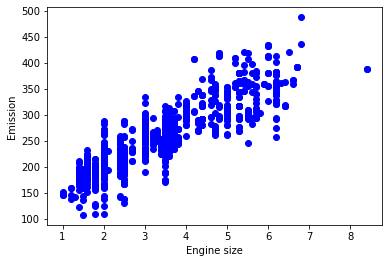

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()




## Practice
#### plot cylinder viz the emission, to seehow linear is their relationship

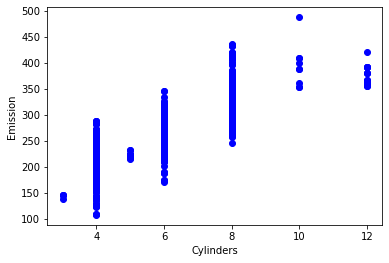

In [9]:
#write your code disini:

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#### Creating train an test dataset
##### Traintest split involves splitting the dataset into training and testing sets that are mutually exclusives. After which, you train with the training set ant test with the testing set. THis will provide a more accurate evaluation on out of sample accruacy beacuse the testingdataset is not part of the dataset that have been used to train the model.therefore, it gives us a better understanding of how well our model generalie on new data.

##### This means that we know the outcome of each data point int the testing dataset, making it gerat to test with! since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out of sample testing.

##### Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. we create a mask to select random rows using np.random.rand()function:

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple regression model

#### Linear regression fits a linear model with coeficients B = (B1...) to minimize the residual sum of squares between the actual value y in the dataset, and the predicted value yhat using lienar approximation.

## Train data distribution

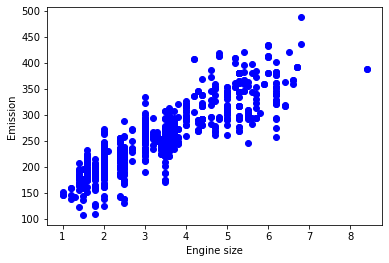

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modelling
#### using sklearn package to model data

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
#The coefficients
print('Coeffiecients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

Coeffiecients:  [[39.00146749]]
Intercept:  [125.46381269]


#### as mentioned before,, Coefficient and intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directlly from our data. Notice that all of the data must be available to transverse and calculate the parameters.

## plot ouputs

Text(0, 0.5, 'Emission')

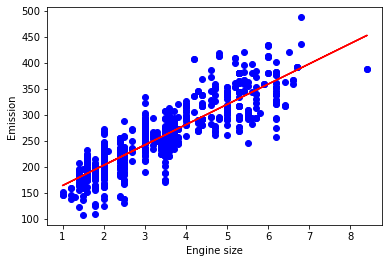

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x+ regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

##### We compare the actual values and predicted values to calculate theh accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that requier improvement.

##### Thera are different model evaluatoin metrics, let's use MSE here to calculate the accuracy of our model based on the test set:
#####  - mean absolute error: it is the mean of the absolute value of the errors. This it the easiest of the metrics to understand since it's just average error. 
##### - MSE mean squared error is the mean of the squared error. It's more popular than Mean absolute error because  teh focus is a geared more towards large errors. this is due the squared term exponentially increasing larger errors in the comparison to smaller one.

##### - Rsquared is not an error, but rather a popular metric to measure the performance of your regressoin model. It represents how close the data points are to the fitted regression line. The higher the R square values, the better teh model fits your data. The best possible score is 1.0 and it can be negativr (because the model be arbitrairy wrong)
 

In [14]:
from sklearn.metrics import r2_score

test_x= np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

print("Mean absolute errorr: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute errorr: 22.44
Residual sum of squares (MSE): 880.25
R2-score: 0.76


## Exercise

In [15]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x= test[["FUELCONSUMPTION_COMB"]]

In [16]:
#now train a logistic regression model using train_x you created and the train_y created previosly
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [17]:
#find the predicitons using the model's predict function and the test_x data

predictions= regr.predict(test_x)

In [18]:
#User prediciton ant the test_y data and find the MAE value by using np.absolute and np.mean function like done previosly
#ADD code
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 20.08


# Guidance Multiple Linear Regression

In [19]:
df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\Week 10-20221107T033716Z-001\Week 10\FuelConsumption.csv")
 #take a look at the database
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [20]:
#Let's select some feature to explore more

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


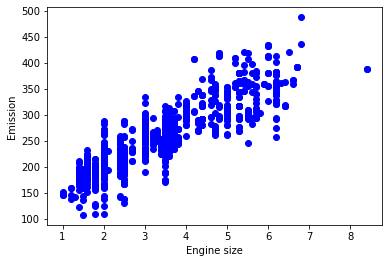

In [21]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [22]:
#### Creating train an test dataset
##### Traintest split involves splitting the dataset into training and testing sets that are mutually exclusives. After which, you train with the training set ant test with the testing set. THis will provide a more accurate evaluation on out of sample accruacy beacuse the testingdataset is not part of the dataset that have been used to train the model.therefore, it gives us a better understanding of how well our model generalie on new data.

##### This means that we know the outcome of each data point int the testing dataset, making it gerat to test with! since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out of sample testing.

##### Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. we create a mask to select random rows using np.random.rand()function:

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

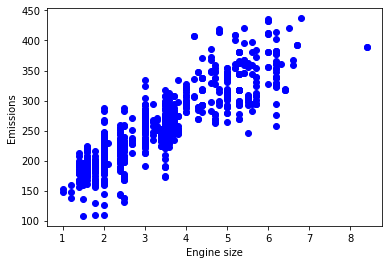

In [23]:
#train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

# Multiple Regression Model

In [24]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#The coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[10.03164926  8.28583717  9.40862069]]


## Prediction

In [25]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
     % np.mean((y_hat -y) **2))

#explained variance score: is perfecft prediction
print('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 563.79
Variance score: 0.88


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Practice

In [26]:
#try to use a multiple linear regression with the same dataset, but this time use fuelconsumption_city and FUELCONSUMPTOIN_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_ - y)**2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.1223226   7.90641571  6.05912431  3.06009878]]
Residual sum of squares: 564.13
Variance score: 0.88


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Guided polynomial linear regression

In [27]:
df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\Week 10-20221107T033716Z-001\Week 10\FuelConsumption.csv")
 #take a look at the database
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [28]:
#Let's select some feature to explore more

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


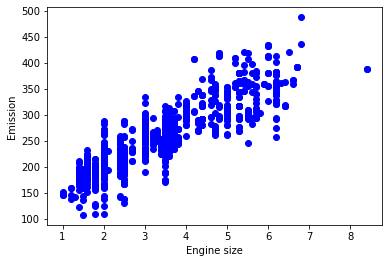

In [29]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()




### Creating train and test dataset




In [30]:
msk = np.random.rand(len(df)) < 0.8
train= cdf[msk]
test = cdf[~msk]

## Polynomial regression

In [31]:
#polynomialfeatures() function in Scikit-learn library, drives a new features sets from the original features set. That is a matrix will be generated consisting of all
#polynomial combinations of the features with degress less tahn or equal to be specified degres. For example, let's say the original feature set has only
#one feature, ENGINESIZE, Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=1 and degree=2;

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y= np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly= poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [32]:
clf = linear_model.LinearRegression()
train_y_= clf.fit(train_x_poly, train_y)
#The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         46.78138051 -0.8721734 ]]
Intercept:  [112.3563397]


Text(0, 0.5, 'Emission')

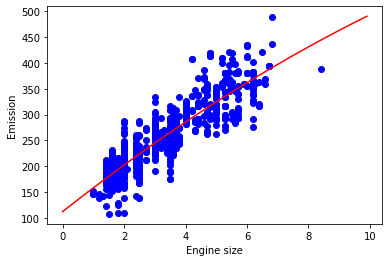

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX+ clf.coef_[0][2]* np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [34]:
from sklearn.metrics import r2_score

test_x_poly= poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) **2))
print("R2-Score: %.2f" %r2_score(test_y, test_y_))

Mean absolute error: 23.58
Residual sum of squares (MSE): 961.41
R2-Score: 0.72


### Practice

Coefficients:  [[ 0.         20.7561717   6.44434207 -0.61979597]]
Intercept:  [139.48414438]
Mean absolute error:  23.55
Residual sum of squares (MSE): 959.38
R2-score: 0.722268


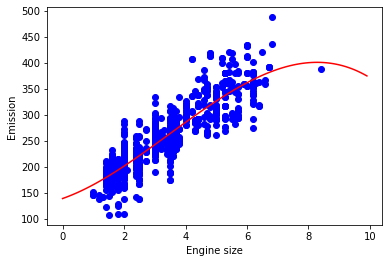

In [36]:
#try to use polynomial regression with the dataset but this time with degree three(cubic), does it result in better accuracy?

poly3 = PolynomialFeatures(degree=3)
train_x_poly3= poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_= clf3.fit(train_x_poly3, train_y)

#The coefficients
print('Coefficients: ', clf3.coef_)
print('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0 , 10.0, 0.1)
yy = (clf3.intercept_[0] +
     clf3.coef_[0][1]*XX +
     clf3.coef_[0][2]*np.power(XX, 2) +
     clf3.coef_[0][3]*np.power(XX, 3))
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error:  %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y)**2))
print("R2-score: %2f" % r2_score(test_y, test_y3_) )

# Exercise

In [2]:
#url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101ENSkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
# fuel = pd.read_csv(url)
#fuel.to_csv("FuelConsumption.csv")

### Reading the data in

In [37]:
df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\Week 10-20221107T033716Z-001\Week 10\sample_submission.csv")
 #take a look at the database
df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


## Data Exploration

In [38]:
#summarize the data
df.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


In [39]:
#Let's select some feature to explore more

cdf = df[['SalePrice']]
cdf.head(9)

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
5,177150.989247
6,172070.659229
7,175110.956520
8,162011.698832


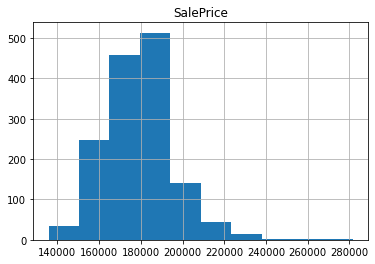

In [41]:
#we can plot each of these features:

viz = cdf[['SalePrice']]
viz.hist()
plt.show()

In [42]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'FUELCONSUMPTION_COMB'

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()




## Practice
#### plot cylinder viz the emission, to seehow linear is their relationship

In [43]:
#write your code disini:

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'CYLINDERS'

#### Creating train an test dataset
##### Traintest split involves splitting the dataset into training and testing sets that are mutually exclusives. After which, you train with the training set ant test with the testing set. THis will provide a more accurate evaluation on out of sample accruacy beacuse the testingdataset is not part of the dataset that have been used to train the model.therefore, it gives us a better understanding of how well our model generalie on new data.

##### This means that we know the outcome of each data point int the testing dataset, making it gerat to test with! since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out of sample testing.

##### Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. we create a mask to select random rows using np.random.rand()function:

In [44]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple regression model

#### Linear regression fits a linear model with coeficients B = (B1...) to minimize the residual sum of squares between the actual value y in the dataset, and the predicted value yhat using lienar approximation.

## Train data distribution

In [45]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'ENGINESIZE'

### Modelling
#### using sklearn package to model data

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
#The coefficients
print('Coeffiecients: ', regr.coef_)
print('Intercept: ',regr.intercept_)

KeyError: "None of [Index(['ENGINESIZE'], dtype='object')] are in the [columns]"

#### as mentioned before,, Coefficient and intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directlly from our data. Notice that all of the data must be available to transverse and calculate the parameters.

## plot ouputs

In [47]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x+ regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

AttributeError: 'DataFrame' object has no attribute 'ENGINESIZE'

## Evaluation

##### We compare the actual values and predicted values to calculate theh accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that requier improvement.

##### Thera are different model evaluatoin metrics, let's use MSE here to calculate the accuracy of our model based on the test set:
#####  - mean absolute error: it is the mean of the absolute value of the errors. This it the easiest of the metrics to understand since it's just average error. 
##### - MSE mean squared error is the mean of the squared error. It's more popular than Mean absolute error because  teh focus is a geared more towards large errors. this is due the squared term exponentially increasing larger errors in the comparison to smaller one.

##### - Rsquared is not an error, but rather a popular metric to measure the performance of your regressoin model. It represents how close the data points are to the fitted regression line. The higher the R square values, the better teh model fits your data. The best possible score is 1.0 and it can be negativr (because the model be arbitrairy wrong)
 

In [48]:
from sklearn.metrics import r2_score

test_x= np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

print("Mean absolute errorr: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

KeyError: "None of [Index(['ENGINESIZE'], dtype='object')] are in the [columns]"

## Exercise

In [49]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x= test[["FUELCONSUMPTION_COMB"]]

KeyError: "None of [Index(['FUELCONSUMPTION_COMB'], dtype='object')] are in the [columns]"

In [50]:
#now train a logistic regression model using train_x you created and the train_y created previosly
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [51]:
#find the predicitons using the model's predict function and the test_x data

predictions= regr.predict(test_x)

In [52]:
#User prediciton ant the test_y data and find the MAE value by using np.absolute and np.mean function like done previosly
#ADD code
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 23.88


# Guidance Multiple Linear Regression

In [53]:
df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\Week 10-20221107T033716Z-001\Week 10\FuelConsumption.csv")
 #take a look at the database
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [54]:
#Let's select some feature to explore more

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


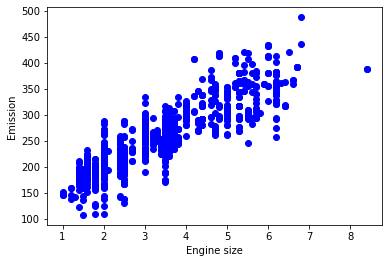

In [55]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [56]:
#### Creating train an test dataset
##### Traintest split involves splitting the dataset into training and testing sets that are mutually exclusives. After which, you train with the training set ant test with the testing set. THis will provide a more accurate evaluation on out of sample accruacy beacuse the testingdataset is not part of the dataset that have been used to train the model.therefore, it gives us a better understanding of how well our model generalie on new data.

##### This means that we know the outcome of each data point int the testing dataset, making it gerat to test with! since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out of sample testing.

##### Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. we create a mask to select random rows using np.random.rand()function:

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

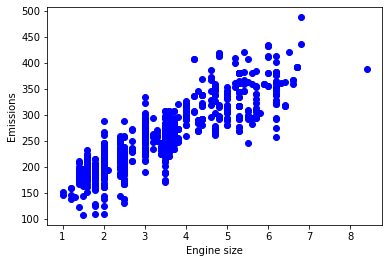

In [57]:
#train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emissions")
plt.show()

# Multiple Regression Model

In [58]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
#The coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[10.01339911  8.07909249  9.53188129]]


## Prediction

In [59]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
     % np.mean((y_hat -y) **2))

#explained variance score: is perfecft prediction
print('Variance score: %.2f' % regr.score(x,y))

Residual sum of squares: 428.03
Variance score: 0.89


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Practice

In [60]:
#try to use a multiple linear regression with the same dataset, but this time use fuelconsumption_city and FUELCONSUMPTOIN_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print('Coefficients: ', regr.coef_)
y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_ - y)**2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.09595058  7.6340432   6.4023226   2.76120775]]
Residual sum of squares: 430.28
Variance score: 0.89


C:\Users\Darren\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Guided polynomial linear regression

In [61]:
df = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\Week 10-20221107T033716Z-001\Week 10\FuelConsumption.csv")
 #take a look at the database
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [62]:
#Let's select some feature to explore more

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


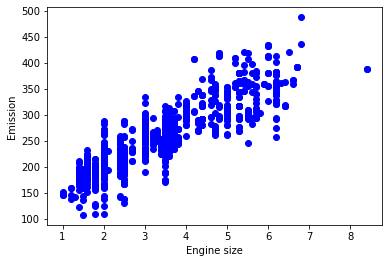

In [63]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()




### Creating train and test dataset




In [64]:
msk = np.random.rand(len(df)) < 0.8
train= cdf[msk]
test = cdf[~msk]

## Polynomial regression

In [65]:
#polynomialfeatures() function in Scikit-learn library, drives a new features sets from the original features set. That is a matrix will be generated consisting of all
#polynomial combinations of the features with degress less tahn or equal to be specified degres. For example, let's say the original feature set has only
#one feature, ENGINESIZE, Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=1 and degree=2;

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y= np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly= poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [66]:
clf = linear_model.LinearRegression()
train_y_= clf.fit(train_x_poly, train_y)
#The coefficients
print('Coefficients: ', clf.coef_)
print('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         51.63165801 -1.6504215 ]]
Intercept:  [105.17263872]


Text(0, 0.5, 'Emission')

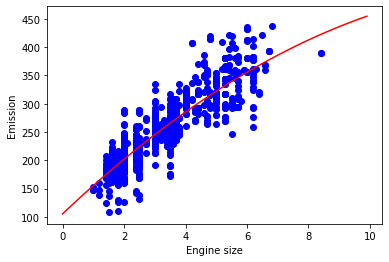

In [67]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX+ clf.coef_[0][2]* np.power(XX,2)
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation

In [68]:
from sklearn.metrics import r2_score

test_x_poly= poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) **2))
print("R2-Score: %.2f" %r2_score(test_y, test_y_))

Mean absolute error: 23.86
Residual sum of squares (MSE): 973.05
R2-Score: 0.76


### Practice

Coefficients:  [[ 0.         30.51360104  4.14178835 -0.47804882]]
Intercept:  [127.67516937]
Mean absolute error:  23.88
Residual sum of squares (MSE): 970.53
R2-score: 0.757450


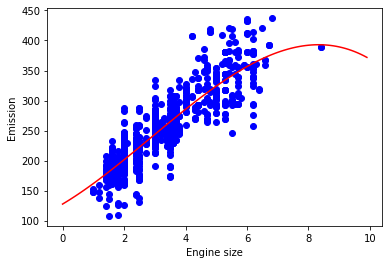

In [69]:
#try to use polynomial regression with the dataset but this time with degree three(cubic), does it result in better accuracy?

poly3 = PolynomialFeatures(degree=3)
train_x_poly3= poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_= clf3.fit(train_x_poly3, train_y)

#The coefficients
print('Coefficients: ', clf3.coef_)
print('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0 , 10.0, 0.1)
yy = (clf3.intercept_[0] +
     clf3.coef_[0][1]*XX +
     clf3.coef_[0][2]*np.power(XX, 2) +
     clf3.coef_[0][3]*np.power(XX, 3))
plt.plot(XX, yy, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error:  %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y)**2))
print("R2-score: %2f" % r2_score(test_y, test_y3_) )